In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [2]:
# Read CSV data files into a Dataframe
df_test = pd.read_csv("/content/test_clean.csv")
df_train = pd.read_csv("/content/train_clean.csv")


In [3]:
#Preview data
df_train.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [4]:
df_train.shape

(891, 14)

In [5]:
df_train.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title', 'Family_Size'],
      dtype='object')

In [6]:
# check missing values in train data
df_train.isnull().sum()

Age              0
Cabin          687
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
Title            0
Family_Size      0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [8]:
df_train.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.445196,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,0.904602
std,13.244896,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,1.613459
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,0.000000
75%,35.500000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,10.000000


In [9]:
#Max and Min age
print(f"Max value of age column : {df_train['Age'].max()}")
print(f"Min value of age column : {df_train['Age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


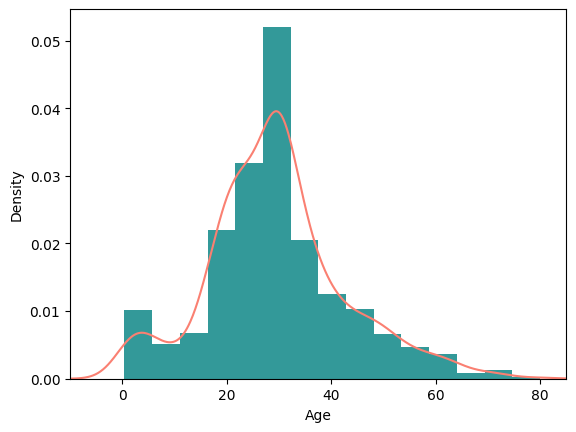

In [25]:
#Plot
ax = df_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.8)
df_train["Age"].plot(kind='density', color='salmon')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [11]:
#How many Male and Female are survived
df_train[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(by='Survived')

,Survived
Sex,
male,109.0
female,233.0


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    645
C    169
Q     77
Name: Embarked, dtype: int64


<ipython-input-12-7c065d8b454e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df_train, palette='husl')


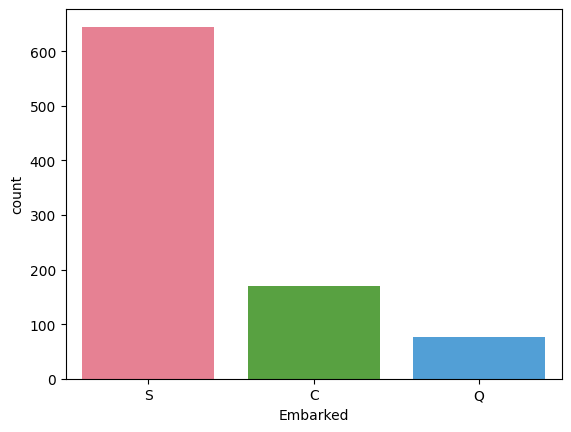

In [12]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df_train, palette='husl')
plt.show()

In [13]:
## Create categorical variable for traveling alone
df_train['TravelAlone']=np.where((df_train["SibSp"]+df_train["Parch"])>0, 0, 1)
df_train.drop('SibSp', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)

In [14]:
#create categorical variables and drop some variables
training=pd.get_dummies(df_train, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()


,Age,Cabin,Fare,Survived,Title,Family_Size,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,22.0,NaN,7.2500,0.0,Mr,1,0,0,0,1,0,0,1,1
1,38.0,C85,71.2833,1.0,Mrs,1,0,1,0,0,1,0,0,0
2,26.0,NaN,7.9250,1.0,Miss,0,1,0,0,1,0,0,1,0
3,35.0,C123,53.1000,1.0,Mrs,1,0,1,0,0,0,0,1,0
4,35.0,NaN,8.0500,0.0,Mr,0,1,0,0,1,0,0,1,1


<Axes: xlabel='Age', ylabel='Count'>

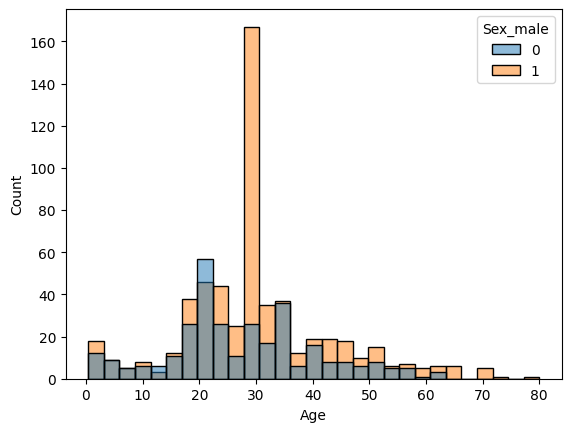

In [15]:
# @title Distribution of Age by Sex

sns.histplot(x = "Age", hue = "Sex_male", data = final_train)

<ipython-input-16-eafea832111b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_train["Age"][df_train.Survived == 1], color="darkturquoise", shade=True)
<ipython-input-16-eafea832111b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train["Age"][df_train.Survived == 0], color="lightcoral", shade=True)


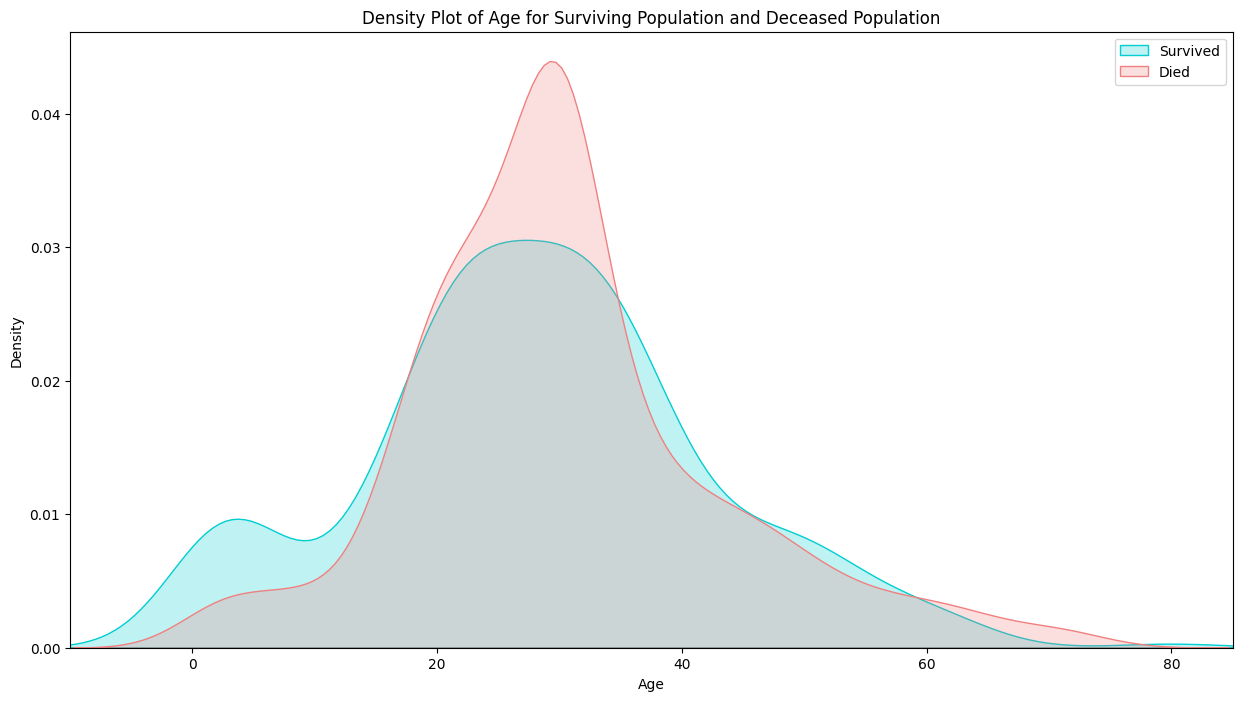

In [16]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Age"][df_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_train["Age"][df_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<ipython-input-17-c15cf7a3f5ab>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_train["Fare"][df_train.Survived == 1], color="darkturquoise", shade=True)
<ipython-input-17-c15cf7a3f5ab>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train["Fare"][df_train.Survived == 0], color="lightcoral", shade=True)


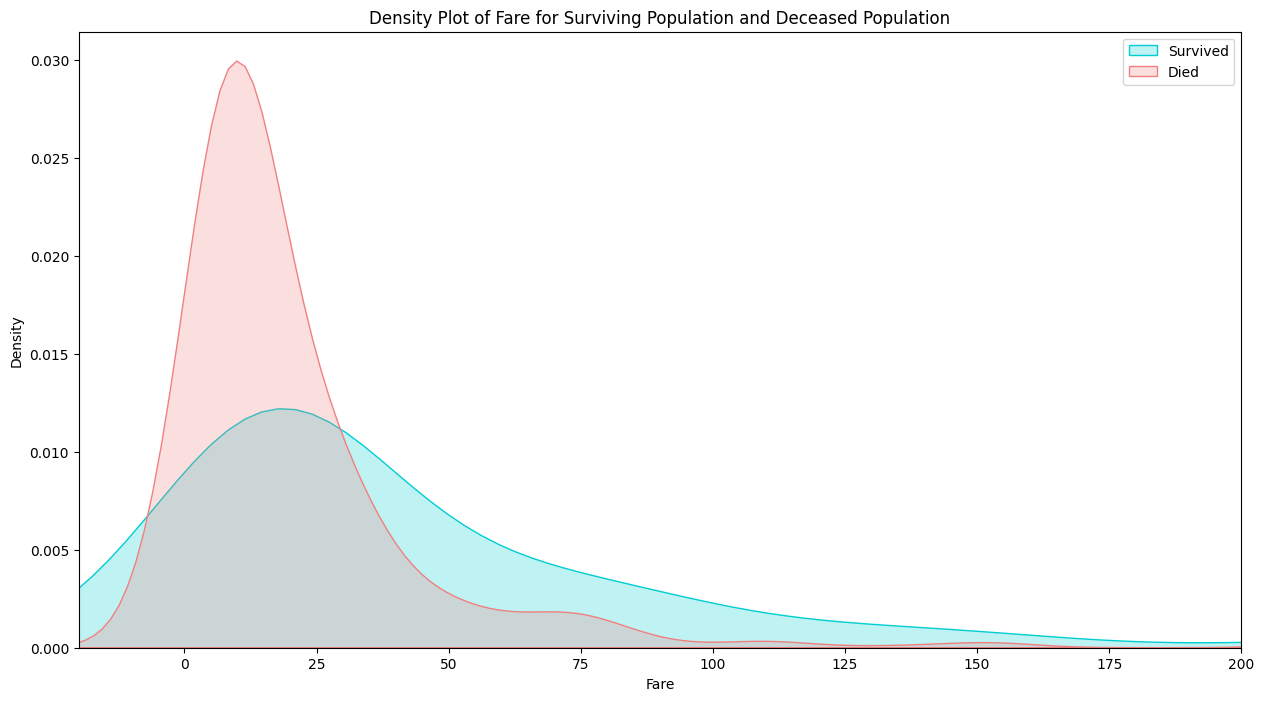

In [17]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Fare"][df_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df_train["Fare"][df_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

In [19]:
test_data = df_test.copy()
test_data["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(df_train["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,Survived,Title,Family_Size,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,NaN,Mr,0,1,0,0,1,0,1,0,1
1,47.0,7.0000,NaN,Mrs,1,0,0,0,1,0,0,1,0
2,62.0,9.6875,NaN,Mr,0,1,0,1,0,0,1,0,1
3,27.0,8.6625,NaN,Mr,0,1,0,0,1,0,0,1,1
4,22.0,12.2875,NaN,Mrs,2,0,0,0,1,0,0,1,0


#### Select features for training and testing

In [20]:
X = final_train.drop(['Survived', 'Cabin', 'Title'], axis = 1)
y = final_train['Survived']
X_test = final_test.drop(['Survived','Title'], axis = 1)
y_test = final_test['Survived']

#### Logistic Regression

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
y_pred = log_reg.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X, y)

y_pred = clf.predict(X_test)

In [23]:
y_pred

array([0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

#### SVM

In [24]:
from sklearn.svm import SVC

clf_svm = SVC()
clf_svm.fit(X, y)
y_pred = clf_svm.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.